Using XGBoost to train classification model off CSAC Clock datasets.

In [2]:
import torch, os
import numpy as np
from dataHandler import ClockDataset

MODEL_FOLDER = os.path.join(os.getcwd(), 'models')
TEST_DATASET = os.path.join(os.getcwd(), 'data/test')
TRAIN_DATASET = os.path.join(os.getcwd(), 'data/train')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
seed = torch.manual_seed(42)

train_dataset = ClockDataset(f_data=TRAIN_DATASET, transform=False)
test_dataset = ClockDataset(f_data=TEST_DATASET, transform=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, verbosity=0 ,eval_metric='logloss')

for data in train_dataset:
    X, y, cols, sn, valid = data

    if valid != 'pass':
        # XGBoost needs y to have both classes 0 and 1. 
        # Setting the first element in this dataset from 1 to 0 as to not skew to many data points.
        if sn == '0015700674':
            y[0] = torch.tensor(0)
            
        X_train, X_test, y_train, y_test = train_test_split(
            X.numpy(),
            y.numpy(),
            test_size=0.2,
            random_state=42
        )
        
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)

        print(f"Clock SN: {sn} | Accuracy: {acc * 100:.2f}%")
        #print(cm)
        #print(class_report)

Clock SN: 0174901630 | Accuracy: 99.99%
Clock SN: 0177301688 | Accuracy: 99.78%
Clock SN: 0181101625 | Accuracy: 100.00%
Clock SN: 0181101625 | Accuracy: 99.99%
Clock SN: 0183101690 | Accuracy: 99.96%
Clock SN: 0184401573 | Accuracy: 99.99%
Clock SN: 0193202070 | Accuracy: 99.95%
Clock SN: 0195002074 | Accuracy: 99.94%
Clock SN: 0199002034 | Accuracy: 99.96%
Clock SN: 0200501814 | Accuracy: 99.99%
Clock SN: 0208002151 | Accuracy: 100.00%
Clock SN: 0210002005 | Accuracy: 100.00%
Clock SN: 0214102149 | Accuracy: 100.00%
Clock SN: 0216100596 | Accuracy: 99.97%


c:\Users\btehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Clock SN: 0015700674 | Accuracy: 100.00%
Clock SN: 0017700590 | Accuracy: 99.98%
Clock SN: 0162101418 | Accuracy: 99.99%
Clock SN: 0163101419 | Accuracy: 100.00%
Clock SN: 0165501495 | Accuracy: 99.99%
Clock SN: 0171901464 | Accuracy: 99.98%
Clock SN: 0172901607 | Accuracy: 99.97%
Clock SN: 0181301559 | Accuracy: 100.00%
Clock SN: 0186601816 | Accuracy: 99.99%
Clock SN: 0016600699 | Accuracy: 99.99%
Clock SN: 0018100721 | Accuracy: 99.98%
Clock SN: 0025700744 | Accuracy: 99.99%
Clock SN: 0026900786 | Accuracy: 100.00%


Making predictions from XGBoost model.

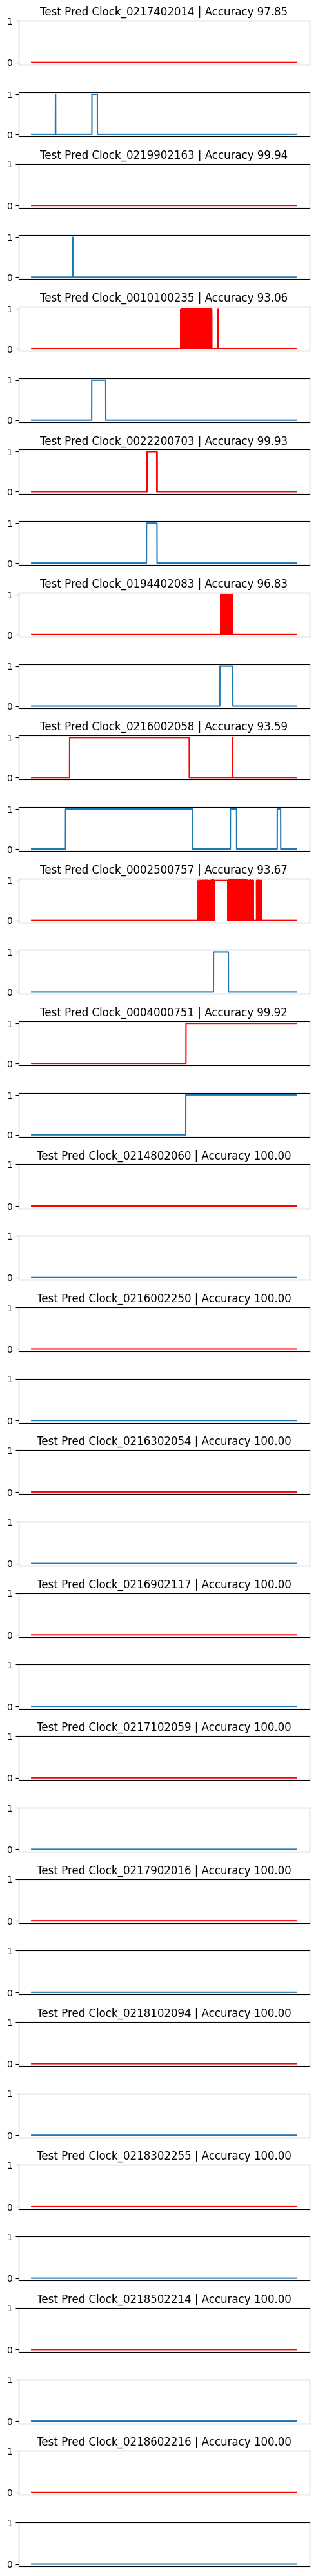

In [9]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=2*test_dataset.__len__(), ncols=1, figsize=(5, 40))
i=0

for data in test_dataset:
    X, y, cols, sn, v = data

    y_preds = xgb_model.predict(X.numpy())
    acc = accuracy_score(y.numpy(), y_preds)

    ax[i].plot(y_preds, c='r')
    #ax[i].axis("off")
    ax[i].set_xticks([])
    ax[i].set_yticks([0,1])
    ax[i].set_title(f'Test Pred Clock_{sn} | Accuracy {acc * 100:.2f}')
    ax[i+1].plot(y.numpy())
    ax[i+1].set_xticks([])
    ax[i+1].set_yticks([0,1])
    #ax[i+1].axis("off")
    i = i+2
    
plt.tight_layout()